In [1]:
## The imports 
import numpy as np
from PIL import Image 
import cv2
from matplotlib import pyplot as plt

In [2]:
#define Variables
POUT_PATH = 'images/pout.tif'
CAMERAMAN_PATH = 'images/cameraman.tif'
CONSTANT = np.pi/4

In [3]:
# We need to read the images that are located in our files
Pout_img = cv2.imread(POUT_PATH, 0) 
Cameraman_img = cv2.imread(CAMERAMAN_PATH, 0)

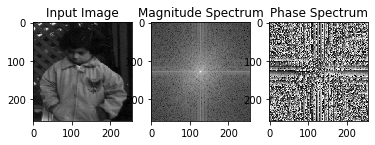

In [4]:
# We will try to calculate the 2D dft of image Pout
DFT_P = cv2.dft(np.float32(Pout_img),flags = cv2.DFT_COMPLEX_OUTPUT)
DFT_P_shift = np.fft.fftshift(DFT_P)
Mag_P, Phase_P = cv2.cartToPolar(DFT_P_shift[:,:,0], DFT_P_shift[:,:,1], angleInDegrees=0)
# We also plot the images
plt.subplot(131),plt.imshow(Pout_img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(132), plt.imshow(20 * np.log(Mag_P), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.subplot(133), plt.imshow(Phase_P, cmap = 'gray')
plt.title('Phase Spectrum')
plt.show()

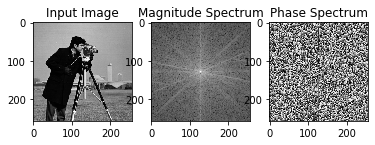

In [5]:
# We will try to calculate the 2D dft of image Cameraman
DFT_C = cv2.dft(np.float32(Cameraman_img),flags = cv2.DFT_COMPLEX_OUTPUT)
DFT_C_shift = np.fft.fftshift(DFT_C)
Mag_C, Phase_C = cv2.cartToPolar(DFT_C_shift[:,:,0], DFT_C_shift[:,:,1], angleInDegrees=0)
# We also plot the images
plt.subplot(131),plt.imshow(Cameraman_img, cmap = 'gray')
plt.title('Input Image')
plt.subplot(132), plt.imshow(20 * np.log(Mag_C), cmap = 'gray')
plt.title('Magnitude Spectrum')
plt.subplot(133), plt.imshow(Phase_C, cmap = 'gray')
plt.title('Phase Spectrum')
plt.show()

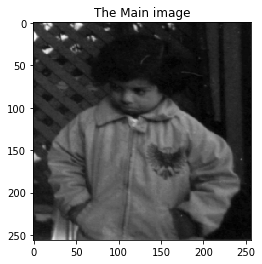

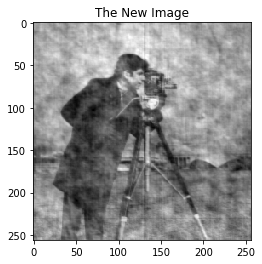

In [14]:
# We measure the magnitude and phase of the Pout and Cameraman and combine the magnitude of Pout with phase of cameraman
rows, cols = Pout_img.shape
New_DFT_P = np.zeros((rows,cols,2),np.float32)
New_DFT_P[:,:,0] = Mag_P * np.cos(Phase_C)
New_DFT_P[:,:,1] = Mag_P * np.sin(Phase_C)

f_ishift = np.fft.ifftshift(New_DFT_P)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# At the final stage we plot the new image
plt.imshow(Pout_img, cmap = 'gray')
plt.title('The Main image')
plt.show()
plt.imshow(img_back, cmap = 'gray')
plt.title('The New Image')
plt.show()

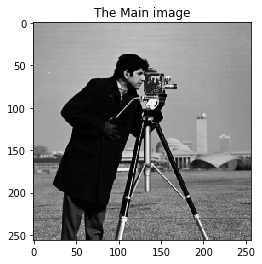

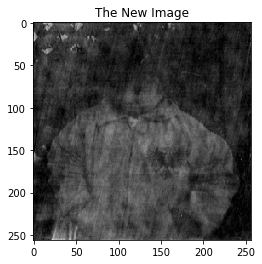

In [15]:
# We measure the magnitude and phase of the Pout and Cameraman and combine the magnitude of Cameraman with phase of Pout
rows, cols = Pout_img.shape
rows, cols = Cameraman_img.shape
New_DFT_C = np.zeros((rows,cols,2),np.float32)
New_DFT_C[:,:,0] = Mag_C * np.cos(Phase_P)
New_DFT_C[:,:,1] = Mag_C * np.sin(Phase_P)

f_ishift = np.fft.ifftshift(New_DFT_C)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])

# At the final stage we plot the new image
plt.imshow(Cameraman_img, cmap = 'gray')
plt.title('The Main image')
plt.show()
plt.imshow(img_back, cmap = 'gray')
plt.title('The New Image')
plt.show()

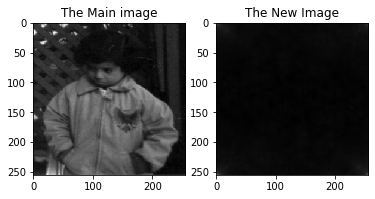

In [12]:
# In this part we are applying a constant phase to the image to see what will be the output
rows, cols = Pout_img.shape
New_DFT_P = np.zeros((rows,cols,2),np.float32)
New_DFT_P[:,:,0] = Mag_P * np.cos(CONSTANT)
New_DFT_P[:,:,1] = Mag_P * np.sin(CONSTANT)
# At the final stage we plot the new image
f_ishift = np.fft.ifftshift(New_DFT_P)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(Pout_img, cmap = 'gray')
plt.title('The Main image')
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('The New Image')
plt.show()

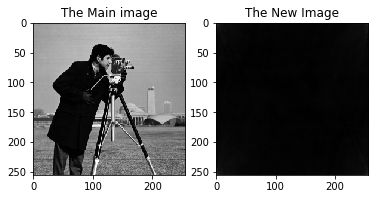

In [13]:
# In this part we are applying a constant phase to the image to see what will be the output
rows, cols = Cameraman_img.shape
New_DFT_C = np.zeros((rows,cols,2),np.float32)
New_DFT_C[:,:,0] = Mag_C * np.cos(CONSTANT)
New_DFT_C[:,:,1] = Mag_C * np.sin(CONSTANT)
# At the final stage we plot the new image
f_ishift = np.fft.ifftshift(New_DFT_C)
img_back = cv2.idft(f_ishift)
img_back = cv2.magnitude(img_back[:,:,0],img_back[:,:,1])
plt.subplot(121),plt.imshow(Cameraman_img, cmap = 'gray')
plt.title('The Main image')
plt.subplot(122),plt.imshow(img_back, cmap = 'gray')
plt.title('The New Image')
plt.show()